In [1]:
# 载入依赖包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# 画图的主题设计
sns.set_theme()
sns.set_context('notebook')

In [2]:
# 加载数据
data_user = pd.read_csv('user_action.csv')
data_user.head()

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20
2,98607707,64749712,1,2883,2014-12-18 11
3,98662432,320593836,1,6562,2014-12-06 10
4,98145908,290208520,1,13926,2014-12-16 21


In [3]:
# 查看数据集量级
print('Total Number: ',len(data_user))
print('User Number: ',len(set(data_user['user_id'])))
print('Item Number: ：',len(set(data_user['item_id'])))
print('Item Category Number: ',len(set(data_user['item_category'])))

Total Number:  12256906
User Number:  10000
Item Number: ： 2876947
Item Category Number:  8916


In [4]:
# 查看数据缺失情况
data_user.isnull().sum()

user_id          0
item_id          0
behavior_type    0
item_category    0
time             0
dtype: int64

In [5]:
# 分割date, year, month, day, hour
data_user['date'] = data_user['time'].map(lambda x: x.split(' ')[0])
data_user['year'] = data_user['date'].map(lambda x: x.split('-')[0])
data_user['month'] = data_user['date'].map(lambda x: x.split('-')[1])
data_user['day'] = data_user['date'].map(lambda x: x.split('-')[2])
data_user['hour'] = data_user['time'].map(lambda x: x.split(' ')[1])
#data_user.head()

In [6]:
# 查看数据类型
data_user.dtypes

user_id           int64
item_id           int64
behavior_type     int64
item_category     int64
time             object
date             object
year             object
month            object
day              object
hour             object
dtype: object

In [7]:
# 数据类型转换
data_user['user_id'] = data_user['user_id'].astype('object')
data_user['item_id'] = data_user['item_id'].astype('object')
data_user['item_category'] = data_user['item_category'].astype('object')
data_user['date'] = pd.to_datetime(data_user['date'])
data_user['hour'] = data_user['hour'].astype('int64')
data_user['year'] = data_user['year'].astype('int64')
data_user['month'] = data_user['month'].astype('int64')
data_user['day'] = data_user['day'].astype('int64')

data_user.dtypes

user_id                  object
item_id                  object
behavior_type             int64
item_category            object
time                     object
date             datetime64[ns]
year                      int64
month                     int64
day                       int64
hour                      int64
dtype: object

# 流量分析

### 基于天级别

In [8]:
# 日访问量
pv_daily = data_user.groupby('date')['user_id'].count()
pv_daily = pv_daily.reset_index() 
pv_daily = pv_daily.rename(columns={'user_id':'pv_daily'})
pv_daily.head()

,date,pv_daily
0,2014-11-18,366701
1,2014-11-19,358823
2,2014-11-20,353429
3,2014-11-21,333104
4,2014-11-22,361355


In [10]:
# 日独立访问量
uv_daily = data_user.groupby('date')['user_id'].apply(lambda x: len(x.unique()))
uv_daily = uv_daily.reset_index() 
uv_daily = uv_daily.rename(columns={'user_id':'uv_daily'})
uv_daily.head()

,date,uv_daily
0,2014-11-18,6343
1,2014-11-19,6420
2,2014-11-20,6333
3,2014-11-21,6276
4,2014-11-22,6187


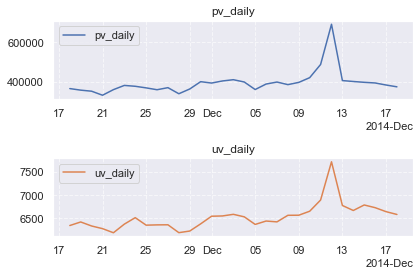

In [11]:
# 可视化

fig, axes = plt.subplots(2, 1)
axes[0].plot(pv_daily["date"], pv_daily["pv_daily"], color="C0", label='pv_daily')
axes[0].set_title("pv_daily")
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].legend()

axes[1].plot(uv_daily["date"], uv_daily["uv_daily"], color="C1", label='uv_daily')
axes[1].set_title("uv_daily")
axes[1].grid(True, linestyle="--", alpha=0.6)
axes[1].legend()

locator = mdates.AutoDateLocator()       # 自动间隔
formatter = mdates.ConciseDateFormatter(locator)  # 简洁日期格式
for ax in axes:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

12号时出现尖峰，这是双十二大促用户集中消费导致的结果

### 基于小时级别

In [12]:
# 访问量
pv_hour = data_user.groupby('hour')['user_id'].count()
pv_hour = pv_hour.reset_index()
pv_hour = pv_hour.rename(columns={'user_id': 'pv_hour'})
pv_hour.head()

,hour,pv_hour
0,0,517404
1,1,267682
2,2,147090
3,3,98516
4,4,80487


In [13]:
# 独立访问量
uv_hour = data_user.groupby('hour')['user_id'].apply(lambda x: len(x.unique()))
uv_hour = uv_hour.reset_index()
uv_hour = uv_hour.rename(columns={'user_id': 'uv_hour'})
uv_hour.head()

,hour,uv_hour
0,0,5786
1,1,3780
2,2,2532
3,3,1937
4,4,1765


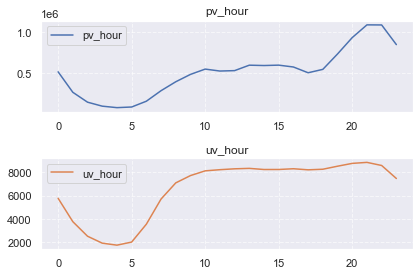

In [14]:
# 可视化
import matplotlib.dates as mdates

fig,axes = plt.subplots(2,1)

axes[0].plot(pv_hour['hour'], pv_hour['pv_hour'], color='C0',label='pv_hour')
axes[0].set_title('pv_hour')
axes[0].grid(True, linestyle='--',alpha=0.6)
axes[0].legend()

axes[1].plot(uv_hour['hour'], uv_hour['uv_hour'], color='C1',label='uv_hour')
axes[1].set_title('uv_hour')
axes[1].grid(True, linestyle='--',alpha=0.6)
axes[1].legend()

plt.tight_layout()
plt.show()

PV的高峰值出现在20点之后，可能是因为主力消费人群是工薪阶层，这部分群体在下班后开始浏览购物；UV的值比较恒定，上午10点之后便没有出现大的波动，一个可能的原因是用户早晨也会刷一下，比如看看物流状态，UV值在一天之内就不会再有大的变化波动了。 另外也可以看出，凌晨2点之后，PV/UV的趋势一致，均是一天中流量最小的时间段。

In [15]:
# 双十二当天的用户访问数据
data_user_1212 = data_user.loc[(data_user['month']==12) & (data_user['day']==12)]
data_user_1212.head()

,user_id,item_id,behavior_type,item_category,time,date,year,month,day,hour
13,101260672,212072908,1,10984,2014-12-12 11,2014-12-12,2014,12,12,11
20,101781721,19349307,1,1863,2014-12-12 12,2014-12-12,2014,12,12,12
54,100684618,94486594,1,10984,2014-12-12 23,2014-12-12,2014,12,12,23
69,103802946,190848347,1,5232,2014-12-12 22,2014-12-12,2014,12,12,22
95,104811265,354843735,1,10585,2014-12-12 21,2014-12-12,2014,12,12,21


In [19]:
# 双十二当天每小时访问量
pv_hour_1212 = data_user_1212.groupby('hour')['user_id'].count()
pv_hour_1212 = pv_hour_1212.reset_index()
pv_hour_1212 = pv_hour_1212.rename(columns={'user_id':'pv_hour_1212'})
pv_hour_1212.head()

,hour,pv_hour_1212
0,0,50030
1,1,22761
2,2,11754
3,3,6173
4,4,5168


In [17]:
# 双十二当天每小时独立访问量
uv_hour_1212 = data_user_1212.groupby('hour')['user_id'].apply(lambda x: len(x.unique()))
uv_hour_1212 = uv_hour_1212.reset_index()
uv_hour_1212 = uv_hour_1212.rename(columns={'user_id':'uv_hour_1212'})
uv_hour_1212.head()

,hour,uv_hour_1212
0,0,1569
1,1,811
2,2,411
3,3,255
4,4,211


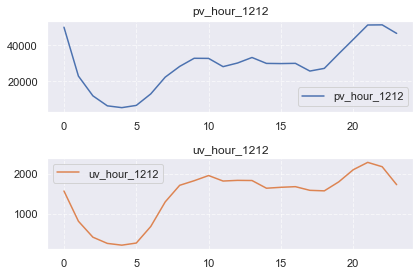

In [20]:
# 可视化
fig,axes = plt.subplots(2,1)
axes[0].plot(pv_hour_1212['hour'], pv_hour_1212['pv_hour_1212'], color='C0',label='pv_hour_1212')
axes[0].set_title('pv_hour_1212')
axes[0].grid(True, linestyle='--',alpha=0.6)
axes[0].legend()
axes[1].plot(uv_hour_1212['hour'], uv_hour_1212['uv_hour_1212'], color='C1',label='uv_hour_1212')
axes[1].set_title('uv_hour_1212')
axes[1].grid(True, linestyle='--',alpha=0.6)
axes[1].legend()
plt.tight_layout()
plt.show()

双十二当天，PV变化趋与一个月内的PV变化趋势基本一致，只不过曲线不太平滑，多出来小的凸点，一个可能的原因是大促当天，有整点领券活动，通过推送等形式会有效拉动用户使用淘宝。UV变化趋势稍有不同，可以看到双十二当天在晚上8点之后UV出现了小高峰，表明了大促当天用户的消费意愿还是比较强烈。

# 用户行为分析

In [22]:
pv_behavior = data_user.groupby(['behavior_type', 'hour'])['user_id'].count()
pv_behavior = pv_behavior.reset_index()
pv_behavior = pv_behavior.rename(columns={'user_id':'pv_behavior'})
pv_behavior.head()

,behavior_type,hour,pv_behavior
0,1,0,487341
1,1,1,252991
2,1,2,139139
3,1,3,93250
4,1,4,75832


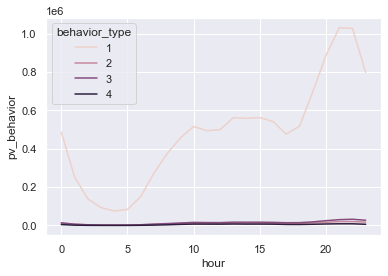

In [23]:
# 可视化
ax = sns.lineplot(x='hour',y='pv_behavior',hue='behavior_type',data=pv_behavior)

action_type为1（浏览行为）的占比非常大，导致上图其它几类action的趋势不太明显，因此去掉action_type为1的数据后再进行分析：

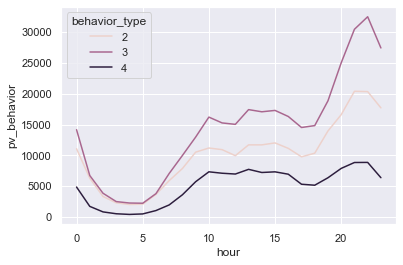

In [24]:
sns.lineplot(x='hour',y='pv_behavior',hue='behavior_type',data=pv_behavior[pv_behavior.behavior_type!=1])

4种行为按照小时的变化趋势基本一致，都是在晚上8点之后有明显增长，凌晨2-6点是低峰，符合常识。

In [49]:
# 双十二当天用户行为分析
pv_behavior_1212 = data_user_1212.groupby(['behavior_type', 'hour'])['user_id'].count()
pv_behavior_1212 = pv_behavior_1212.reset_index()
pv_behavior_1212 = pv_behavior_1212.rename(columns={'user_id':'pv_behavior_1212'})
pv_behavior_1212.head()

,behavior_type,hour,pv_behavior_1212
0,1,0,45229
1,1,1,20988
2,1,2,10896
3,1,3,5762
4,1,4,4827


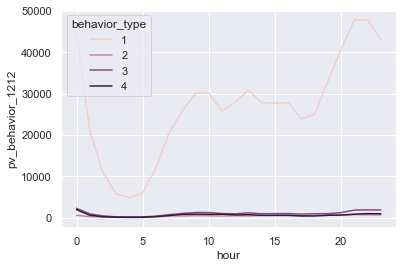

In [50]:
# 可视化
sns.lineplot(x='hour',y='pv_behavior_1212',hue='behavior_type',data=pv_behavior_1212)

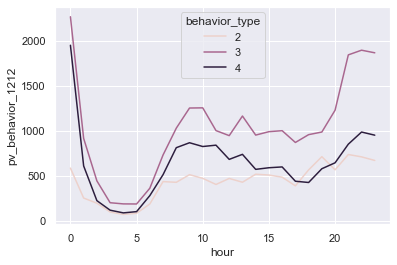

In [51]:
sns.lineplot(x='hour',y='pv_behavior_1212',hue='behavior_type',data=pv_behavior_1212[pv_behavior_1212.behavior_type!=1])

# 转化率分析

In [26]:
behavior_type = data_user.groupby(['behavior_type'])['user_id'].count()
behavior_type.head()

behavior_type
1    11550581
2      242556
3      343564
4      120205
Name: user_id, dtype: int64

用户浏览（action_type=1）的基数是最大的，因为加购和收藏没有必然联系，因此把这两类合并在一起做分析：

In [27]:
click_num, fav_num, add_num, pay_num =  behavior_type[1], behavior_type[2], behavior_type[3], behavior_type[4]

fav_add_num = fav_num + add_num 
print('加购/收藏转化率：', 100 * fav_add_num / click_num)
print('点击 到 购买转化率: ', 100 * pay_num / click_num)
print('加购/收藏 到 购买转化率: ', 100 * pay_num / fav_add_num)

加购/收藏转化率： 5.074376778103197
点击 到 购买转化率:  1.0406835811982098
加购/收藏 到 购买转化率:  20.508598921722513


从浏览到加购/收藏的转化率大约5%；“加购/收藏”后到购买转化率大约为20%，说明用户感兴趣的商品更容易成单。 两者相乘，能粗略估出从浏览到购买的转化率约为1%左右。

In [28]:
behavior_type_1212 = data_user_1212.groupby(['behavior_type'])['user_id'].count()
click_num, fav_num, add_num, pay_num =  behavior_type_1212[1], behavior_type_1212[2], behavior_type_1212[3], behavior_type_1212[4]

fav_add_num = fav_num + add_num 
print('加购/收藏转化率：', 100 * fav_add_num / click_num)
print('点击 到 购买转化率: ', 100 * pay_num / click_num)
print('加购/收藏 到 购买转化率: ', 100 * pay_num / fav_add_num)

加购/收藏转化率： 5.448732437837779
点击 到 购买转化率:  2.3773707847303305
加购/收藏 到 购买转化率:  43.631630142472964


双十二当天，加购/收藏到购买转化率是平时的2倍之多，此外，加购/收藏的转化率也比平时高出不少，说明大促的运营活动对用户活跃度的转化起到了很好的促进作用。
商家在特定节日推出特定主题的优惠活动，是个有效的促活、转化的方式。

# 用户价值分析

## 购买频次分析

In [29]:
data_user_buy = data_user[data_user.behavior_type==4].groupby('user_id')['behavior_type'].count()
data_user_buy.head()

user_id
4913      6
6118      1
7528      6
7591     21
12645     8
Name: behavior_type, dtype: int64

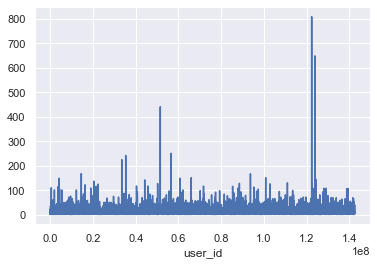

In [30]:
# 可视化
data_user_buy.plot(x='user_id',y='buy_count')

大部分用户的购买次数均不超过50次，这期间还包括了双十二当天的集中购物，排除双十二高峰，实际消费次数会更少。当然也有部分用户的购买次数超过百次，甚至有超过800次的，高频消费的用户可以看作是忠实的超级用户。

## ARPU分析

该数据集中没有对金额的体现,因此对ARPU这个指标做一些修改，改为度量平台活跃用户每日平均消费次数。

计算公式为： ARPU = 每日消费总次数 / 每日活跃用户数

In [31]:
#给数据集中每一个用户赋值一个1，表示有登录操作
data_user['action'] = 1 

data_user_arpu = data_user.groupby(['date','user_id','behavior_type'])['action'].count()
data_user_arpu = data_user_arpu.reset_index()

data_user_arpu.head()

,date,user_id,behavior_type,action
0,2014-11-18,4913,1,27
1,2014-11-18,4913,2,1
2,2014-11-18,7591,1,4
3,2014-11-18,12645,1,25
4,2014-11-18,54056,1,13


In [34]:
arpu = data_user_arpu.groupby('date').apply(lambda x:x[x['behavior_type']==4]['action'].sum() / len(x['user_id'].unique()) ) 
arpu

date
2014-11-18    0.588050
2014-11-19    0.574143
2014-11-20    0.546660
2014-11-21    0.481358
2014-11-22    0.577016
2014-11-23    0.525184
2014-11-24    0.526025
2014-11-25    0.545426
2014-11-26    0.562058
2014-11-27    0.577135
2014-11-28    0.519955
2014-11-29    0.515906
2014-11-30    0.566860
2014-12-01    0.597341
2014-12-02    0.552824
2014-12-03    0.589977
2014-12-04    0.565151
2014-12-05    0.521282
2014-12-06    0.508075
2014-12-07    0.507007
2014-12-08    0.520871
2014-12-09    0.525282
2014-12-10    0.483464
2014-12-11    0.467943
2014-12-12    1.975518
2014-12-13    0.513282
2014-12-14    0.522346
2014-12-15    0.554590
2014-12-16    0.560410
2014-12-17    0.544182
2014-12-18    0.544819
dtype: float64

Text(0.5, 1.0, 'ARPU')

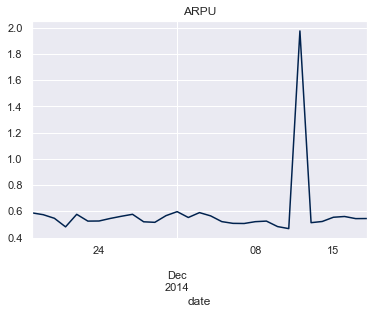

In [35]:
# 可视化
arpu.plot(colormap='cividis')
plt.title('ARPU')

活跃用户每天平均消费次数在0.5次左右，双十二期间达到最高值接近2，是平时的4倍左右，表明用户会集中在大促日的时候购买。

In [53]:
order_rate = data_user_arpu.groupby('date').apply(lambda x: x[x['behavior_type']==4]['user_id'].nunique() / x['user_id'].nunique()) 
order_rate

date
2014-11-18    0.242630
2014-11-19    0.235358
2014-11-20    0.235591
2014-11-21    0.211918
2014-11-22    0.228059
2014-11-23    0.225326
2014-11-24    0.233994
2014-11-25    0.235711
2014-11-26    0.233915
2014-11-27    0.240132
2014-11-28    0.232994
2014-11-29    0.221240
2014-11-30    0.240477
2014-12-01    0.253209
2014-12-02    0.241985
2014-12-03    0.257707
2014-12-04    0.242689
2014-12-05    0.234490
2014-12-06    0.225466
2014-12-07    0.218468
2014-12-08    0.236289
2014-12-09    0.217636
2014-12-10    0.216777
2014-12-11    0.210183
2014-12-12    0.504793
2014-12-13    0.228601
2014-12-14    0.225855
2014-12-15    0.239723
2014-12-16    0.245207
2014-12-17    0.236339
2014-12-18    0.235795
dtype: float64

Text(0.5, 1.0, 'order_rate')

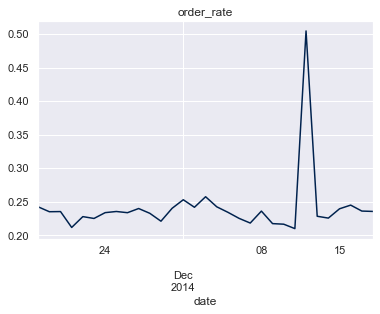

In [54]:
# 可视化
order_rate.plot(colormap='cividis')
plt.title('order_rate')

大部分时候用户下单率不超过25%，在双十二大促这天出现下单率高峰，几乎是平时的两倍，表明用户会集中在大促时进行购买

## ARPPU分析

该数据集中没有收益金额，因此对计算方式做一点转化，将总收入转化为总的购买行为次数。

定义如下：ARPPU = 当日总消费次数/当日活跃用户付费数量 

In [37]:
data_user_arppu = data_user[data_user.behavior_type==4].groupby(['date','user_id'])['behavior_type'].count()
data_user_arppu = data_user_arppu.reset_index()
data_user_arppu = data_user_arppu.rename(columns={'behavior_type':'pay_count'})
data_user_arppu.head()

,date,user_id,pay_count
0,2014-11-18,54056,1
1,2014-11-18,79824,2
2,2014-11-18,88930,2
3,2014-11-18,247543,5
4,2014-11-18,475826,3


In [38]:
arppu = data_user_arppu.groupby('date').apply(lambda x:x['pay_count'].sum() / len(x['user_id'].unique()) )
arppu

date
2014-11-18    2.423652
2014-11-19    2.439444
2014-11-20    2.320375
2014-11-21    2.271429
2014-11-22    2.530120
2014-11-23    2.330780
2014-11-24    2.248031
2014-11-25    2.313961
2014-11-26    2.402824
2014-11-27    2.403405
2014-11-28    2.231623
2014-11-29    2.331881
2014-11-30    2.357236
2014-12-01    2.359083
2014-12-02    2.284543
2014-12-03    2.289334
2014-12-04    2.328707
2014-12-05    2.223041
2014-12-06    2.253444
2014-12-07    2.320741
2014-12-08    2.204384
2014-12-09    2.413576
2014-12-10    2.230236
2014-12-11    2.226363
2014-12-12    3.913523
2014-12-13    2.245320
2014-12-14    2.312749
2014-12-15    2.313460
2014-12-16    2.285455
2014-12-17    2.302548
2014-12-18    2.310567
dtype: float64

Text(0.5, 1.0, 'ARPPU')

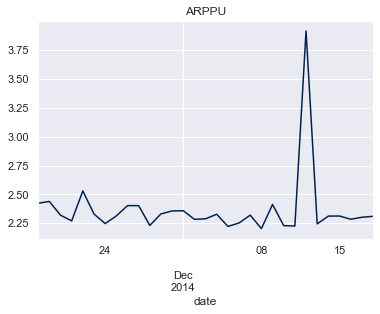

In [40]:
# 可视化
arppu.plot(colormap='cividis')
plt.title('ARPPU')

活跃下单用户平均每日消费次数在2-2.5次之间波动，双十二当天该数值达超过3.75，一个可能的原因是用户会在平时把喜欢的商品进行加购，等到双十二促销当天再下单购买。

## 复购情况分析

复购是指：两天以上都在该平台产生了购买行为，需要指出一天多次的购买不算是复购。

因此复购率的计算方式为：复购率 = 复购用户数量 / 有购买行为的用户数量。

In [42]:
data_user_pay = data_user[data_user.behavior_type==4]
data_user_pay = data_user_pay.groupby('user_id')['date'].apply(lambda x:len(x.unique()))
data_user_pay.head()

user_id
4913     5
6118     1
7528     6
7591     9
12645    4
Name: date, dtype: int64

In [43]:
repeat_buy_ratio = data_user_pay[data_user_pay > 1].count() / data_user_pay.count()
repeat_buy_ratio

0.8717083051991897

## 复购周期分析

In [44]:
data_user['action'] = 1 # 对每一行的行为记为1次，通过对行为次数的相加，从而计算频次
data_user_buy = data_user[data_user.behavior_type == 4]
data_user_buy = data_user_buy.groupby(['user_id','date'])['action'].count()
data_user_buy = data_user_buy.reset_index()
data_user_buy.head()

,user_id,date,action
0,4913,2014-12-01,1
1,4913,2014-12-07,2
2,4913,2014-12-11,1
3,4913,2014-12-13,1
4,4913,2014-12-16,1


In [45]:
data_user_buy_date_diff = data_user_buy.groupby('user_id').date.apply(lambda x:x.sort_values().diff(1).dropna())
data_user_buy_date_diff.head(30)

user_id    
4913     1     6 days
         2     4 days
         3     2 days
         4     3 days
7528     7     4 days
         8     1 days
         9     3 days
         10    3 days
         11   10 days
7591     13    7 days
         14    1 days
         15    1 days
         16    2 days
         17    4 days
         18    1 days
         19    1 days
         20    1 days
12645    22    2 days
         23    4 days
         24   11 days
54056    26   19 days
79824    29    9 days
         30    8 days
         31    6 days
         32    1 days
         33    1 days
         34    3 days
88930    36    2 days
         37    2 days
         38    1 days
Name: date, dtype: timedelta64[ns]

Text(0, 0.5, 'count')

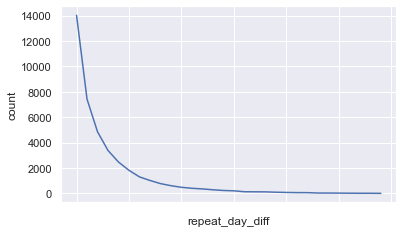

In [46]:
# 可视化
data_user_buy_date_diff.value_counts().plot(kind='line')
plt.xlabel('repeat_day_diff')
plt.ylabel('count')

In [47]:
data_user_buy_date_diff = data_user_buy_date_diff.apply(lambda x:x.days)
data_user_buy_date_diff.head()

user_id   
4913     1    6
         2    4
         3    2
         4    3
7528     7    4
Name: date, dtype: int64

Text(0, 0.5, 'count')

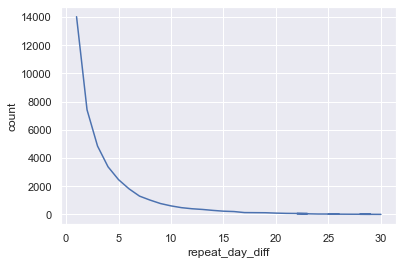

In [48]:
data_user_buy_date_diff.value_counts().plot(kind='line')
plt.xlabel('repeat_day_diff')
plt.ylabel('count')

大部分用户的复购行为发生在5天之内，在第5天复购的行为出现了明显的拐点，如果这个时候采取营销策略提升用户的购买意图，增加更多收益。超过15天后，复购的意愿基本已经趋于0，此时可以考虑采取一些召回策略，增加复购的可能性，防止用户的流失。

# 流失率分析

In [56]:
data_user_count=data_user.groupby(['behavior_type']).count()
data_user_count.head()

,user_id,item_id,item_category,time,date,year,month,day,hour,action
behavior_type,,,,,,,,,,
1,11550581,11550581,11550581,11550581,11550581,11550581,11550581,11550581,11550581,11550581
2,242556,242556,242556,242556,242556,242556,242556,242556,242556,242556
3,343564,343564,343564,343564,343564,343564,343564,343564,343564,343564
4,120205,120205,120205,120205,120205,120205,120205,120205,120205,120205


In [57]:
pv_all = data_user['user_id'].count()
click_all = data_user[data_user['behavior_type'] == 1]['user_id'].count()
fav_all = data_user[data_user['behavior_type'] == 2]['user_id'].count()
add_all = data_user[data_user['behavior_type'] == 3]['user_id'].count()
pay_all = data_user[data_user['behavior_type'] == 4]['user_id'].count()
print('总浏览：', pv_all)
print('点击量：', click_all)
print('收藏量：', fav_all)
print('加购量：', add_all)
print('购买量：', pay_all)

总浏览： 12256906
点击量： 11550581
收藏量： 242556
加购量： 343564
购买量： 120205


In [60]:
# 流失率
print('总浏览量—点击量 流失率：', 100 * (pv_all - click_all) / pv_all)
print('点击量—收藏量 流失率：', 100 * (click_all - fav_all) / click_all)
print('加购量—收藏量 流失率：', 100 * (add_all - fav_all) / add_all)
print('收藏量—购买量 流失率：', 100 * (fav_all - pay_all) / fav_all)

总浏览量—点击量 流失率： 5.762669632939994
点击量—收藏量 流失率： 97.90005368561114
加购量—收藏量 流失率： 29.400053556251528
收藏量—购买量 流失率： 50.442372070779534


# 商品分析

In [64]:
# top 10 点击量商品
data_item_pv = data_user[data_user.behavior_type == 1].groupby('item_id')['user_id'].nunique().sort_values(ascending=False)
data_item_pv.head(10)

item_id
112921337    518
128186279    341
135104537    339
97655171     332
2217535      317
5685392      302
374235261    300
387911330    298
275450912    288
209323160    282
Name: user_id, dtype: int64

In [65]:
# top 10 收藏量商品
data_item_fav = data_user[data_user.behavior_type == 2].groupby('item_id')['user_id'].nunique().sort_values(ascending=False)
data_item_fav.head(10)

item_id
277922302    23
378505512    17
132473636    16
336964100    16
6703599      15
110998572    14
236236780    14
276636269    14
58727293     14
108385699    14
Name: user_id, dtype: int64

In [66]:
# top 10 加购量商品
data_item_add = data_user[data_user.behavior_type == 3].groupby('item_id')['user_id'].nunique().sort_values(ascending=False)
data_item_add.head(10)

item_id
83098075     41
303205878    36
14087919     29
341889939    28
209323160    25
353381230    25
374214353    21
72183675     20
125666923    20
270743160    19
Name: user_id, dtype: int64

In [63]:
# top 10 购买量商品
data_item_buy = data_user[data_user.behavior_type == 4].groupby('item_id')['user_id'].nunique().sort_values(ascending=False)
data_item_buy.head(10)

item_id
167074648    28
14087919     25
303205878    20
83098075     19
331710542    19
Name: user_id, dtype: int64

In [69]:
# 计算重叠度
overlap = len(set(data_item_pv) & set(data_item_buy)) / len(set(data_item_pv))
print("点击商品数：", len(set(data_item_pv)))
print("重叠商品数：", len(set(data_item_pv) & set(data_item_buy)))
print("转化率：", overlap)

点击商品数： 179
重叠商品数： 20
转化率： 0.11173184357541899
